<a href="https://www.arduino.cc/"><img src="https://cdn.shopify.com/s/files/1/0506/1689/3647/products/ABX00031_03.front_1000x750.jpg?v=1626445224" width=200/></a>
# Fall down recognition
 * Ruben Artero - EIP

# Clean and Prepare Data

Clean and prepare datasets


In [57]:
# Import necessary libraries
import pandas as pd
from IPython.display import display

In [58]:
FILE_FALLDOWN = "falldown.csv"
FILE_NORMAL = "normal.csv"

df_falldown = pd.read_csv("content/" + FILE_FALLDOWN, sep=",", encoding="utf-16")
df_normal = pd.read_csv("content/" + FILE_NORMAL, sep=",", encoding="utf-8")

# Strip and format spaces
df_falldown.columns = df_falldown.columns.str.strip()
df_normal.columns = df_falldown.columns.str.strip()

# Add result value per dataset
df_falldown["output"] = [int(1)]*df_falldown.shape[0]
df_normal["output"] = [int(0)]*df_normal.shape[0]

# All outputs in one data frame
frames = [df_falldown, df_normal]
df = pd.concat(frames, ignore_index=True)
df

,accel_x,accel_y,accel_z,gyros_x,gyros_y,gyros_z,output
0,0.416,0.113,0.509,-44.312,26.489,-7.385,1
1,-0.326,-0.052,0.252,117.310,212.158,-7.385,1
2,0.012,0.224,-1.321,88.196,210.083,7.446,1
3,0.214,0.227,-3.074,112.183,21.912,14.404,1
4,0.225,0.258,-1.739,-15.442,-226.929,-23.865,1
...,...,...,...,...,...,...,...
899,0.900,-0.196,-0.083,-18.555,9.216,13.550,0
900,0.947,-0.133,-0.101,-21.179,6.042,16.357,0
901,0.952,-0.125,-0.108,-24.414,9.888,15.198,0
902,0.984,-0.047,-0.148,-12.268,1.343,5.493,0


In [59]:
# Check size and data integrity
print("DF OUTPUT")
display(df.describe())
print("FALLDOWN OUTPUT")
display(df_falldown.describe())
print("NORMAL OUTPUT")
display(df_normal.describe())


DF OUTPUT


,accel_x,accel_y,accel_z,gyros_x,gyros_y,gyros_z,output
count,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000
mean,0.250320,0.055468,-0.265848,5.590790,-2.317041,7.439473,0.467920
std,1.115182,0.769094,1.041375,105.123193,192.222992,139.276433,0.499246
min,-4.000000,-4.000000,-4.000000,-474.915000,-1299.500000,-1087.952000,0.000000
25%,-0.222000,-0.128250,-0.497750,-26.260250,-21.072250,-10.315000,0.000000
50%,0.786500,0.052000,-0.150000,-0.305000,0.762500,-0.305000,0.000000
75%,0.955000,0.229250,0.074000,24.444500,19.698750,13.275500,1.000000
max,2.877000,4.000000,4.000000,1038.330000,1755.066000,1360.168000,1.000000


FALLDOWN OUTPUT


,accel_x,accel_y,accel_z,gyros_x,gyros_y,gyros_z,output
count,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.0
mean,-0.461038,0.026215,-0.380279,13.819324,-6.708232,16.739773,1.0
std,1.283616,1.100360,1.489061,148.305347,280.595576,203.017993,0.0
min,-4.000000,-4.000000,-4.000000,-474.915000,-1299.500000,-1087.952000,1.0
25%,-0.772000,-0.391000,-1.369000,-58.563000,-117.950500,-37.415000,1.0
50%,-0.249000,0.016000,-0.314000,4.211000,-4.944000,2.686000,1.0
75%,0.368000,0.457500,0.535000,63.324000,100.128500,52.246000,1.0
max,2.877000,4.000000,4.000000,1038.330000,1755.066000,1360.168000,1.0


NORMAL OUTPUT


,accel_x,accel_y,accel_z,gyros_x,gyros_y,gyros_z,output
count,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.0
mean,0.875900,0.081193,-0.165216,-1.645530,1.544651,-0.739376,0.0
std,0.230002,0.216485,0.262827,36.613209,16.107335,10.634243,0.0
min,-0.525000,-0.379000,-1.046000,-138.367000,-60.120000,-53.162000,0.0
25%,0.871000,-0.059000,-0.231000,-14.771000,-4.456000,-5.676000,0.0
50%,0.943000,0.063000,-0.129000,-0.916000,1.099000,-0.549000,0.0
75%,0.969000,0.159000,-0.008000,10.010000,8.362000,5.249000,0.0
max,1.253000,0.654000,0.291000,177.551000,62.317000,36.438000,0.0


# Neural Network

In [60]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from IPython.display import display
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

print(f"TensorFlow version = {tf.__version__}\n")


TensorFlow version = 2.9.1



## Analyze data

A continuación se tendrán tres Dataframes:
  1. df_falldown    --> Rreferido cuando se dectea una caida.
  2. df_normal      --> Cuando hay una sitiación normal en la persona que lleva el dispositivo.
  3. df             --> Los dos Dataframes mezclados

In [61]:
# La correlación es una medida estadística que expresa la relación lineal que existe entre dos variables
print(100*"-")
print("Descripción Dataframe DF")
display(df.describe().round(4))
print(100*"-")
print("Descripción Dataframe falldown")
display(df_falldown.describe().round(4))
print(100*"-")
print("Descripción Dataframe normal")
display(df_normal.describe().round(4))
print(100*"-")

----------------------------------------------------------------------------------------------------
Descripción Dataframe DF


,accel_x,accel_y,accel_z,gyros_x,gyros_y,gyros_z,output
count,904.0000,904.0000,904.0000,904.0000,904.0000,904.0000,904.0000
mean,0.2503,0.0555,-0.2658,5.5908,-2.3170,7.4395,0.4679
std,1.1152,0.7691,1.0414,105.1232,192.2230,139.2764,0.4992
min,-4.0000,-4.0000,-4.0000,-474.9150,-1299.5000,-1087.9520,0.0000
25%,-0.2220,-0.1282,-0.4978,-26.2602,-21.0722,-10.3150,0.0000
50%,0.7865,0.0520,-0.1500,-0.3050,0.7625,-0.3050,0.0000
75%,0.9550,0.2292,0.0740,24.4445,19.6987,13.2755,1.0000
max,2.8770,4.0000,4.0000,1038.3300,1755.0660,1360.1680,1.0000


----------------------------------------------------------------------------------------------------
Descripción Dataframe falldown


,accel_x,accel_y,accel_z,gyros_x,gyros_y,gyros_z,output
count,423.0000,423.0000,423.0000,423.0000,423.0000,423.0000,423.0
mean,-0.4610,0.0262,-0.3803,13.8193,-6.7082,16.7398,1.0
std,1.2836,1.1004,1.4891,148.3053,280.5956,203.0180,0.0
min,-4.0000,-4.0000,-4.0000,-474.9150,-1299.5000,-1087.9520,1.0
25%,-0.7720,-0.3910,-1.3690,-58.5630,-117.9505,-37.4150,1.0
50%,-0.2490,0.0160,-0.3140,4.2110,-4.9440,2.6860,1.0
75%,0.3680,0.4575,0.5350,63.3240,100.1285,52.2460,1.0
max,2.8770,4.0000,4.0000,1038.3300,1755.0660,1360.1680,1.0


----------------------------------------------------------------------------------------------------
Descripción Dataframe normal


,accel_x,accel_y,accel_z,gyros_x,gyros_y,gyros_z,output
count,481.0000,481.0000,481.0000,481.0000,481.0000,481.0000,481.0
mean,0.8759,0.0812,-0.1652,-1.6455,1.5447,-0.7394,0.0
std,0.2300,0.2165,0.2628,36.6132,16.1073,10.6342,0.0
min,-0.5250,-0.3790,-1.0460,-138.3670,-60.1200,-53.1620,0.0
25%,0.8710,-0.0590,-0.2310,-14.7710,-4.4560,-5.6760,0.0
50%,0.9430,0.0630,-0.1290,-0.9160,1.0990,-0.5490,0.0
75%,0.9690,0.1590,-0.0080,10.0100,8.3620,5.2490,0.0
max,1.2530,0.6540,0.2910,177.5510,62.3170,36.4380,0.0


----------------------------------------------------------------------------------------------------


In [62]:
# La correlación es una medida estadística que expresa la relación lineal que existe entre dos variables
print(100*"-")
print("Correlación Dataframe DF")
display(df.corr().round(4))
print(100*"-")
print("Correlación Dataframe falldown")
display(df_falldown.corr().round(4))
print(100*"-")
print("Correlación Dataframe normal")
display(df_normal.corr().round(4))
print(100*"-")

----------------------------------------------------------------------------------------------------
Correlación Dataframe DF


,accel_x,accel_y,accel_z,gyros_x,gyros_y,gyros_z,output
accel_x,1.0000,-0.0180,0.0997,-0.1098,0.0082,-0.1851,-0.5985
accel_y,-0.0180,1.0000,-0.2172,-0.0250,-0.0393,-0.0611,-0.0357
accel_z,0.0997,-0.2172,1.0000,-0.0024,0.0733,0.0468,-0.1031
gyros_x,-0.1098,-0.0250,-0.0024,1.0000,-0.0369,-0.0099,0.0734
gyros_y,0.0082,-0.0393,0.0733,-0.0369,1.0000,0.2320,-0.0214
gyros_z,-0.1851,-0.0611,0.0468,-0.0099,0.2320,1.0000,0.0627
output,-0.5985,-0.0357,-0.1031,0.0734,-0.0214,0.0627,1.0000


----------------------------------------------------------------------------------------------------
Correlación Dataframe falldown


,accel_x,accel_y,accel_z,gyros_x,gyros_y,gyros_z,output
accel_x,1.0000,-0.0525,0.0240,-0.0857,-0.0060,-0.1879,NaN
accel_y,-0.0525,1.0000,-0.2419,-0.0293,-0.0416,-0.0596,NaN
accel_z,0.0240,-0.2419,1.0000,0.0080,0.0726,0.0552,NaN
gyros_x,-0.0857,-0.0293,0.0080,1.0000,-0.0391,-0.0126,NaN
gyros_y,-0.0060,-0.0416,0.0726,-0.0391,1.0000,0.2346,NaN
gyros_z,-0.1879,-0.0596,0.0552,-0.0126,0.2346,1.0000,NaN
output,NaN,NaN,NaN,NaN,NaN,NaN,NaN


----------------------------------------------------------------------------------------------------
Correlación Dataframe normal


,accel_x,accel_y,accel_z,gyros_x,gyros_y,gyros_z,output
accel_x,1.0000,0.0324,0.7074,-0.0216,0.0064,-0.0274,NaN
accel_y,0.0324,1.0000,0.2748,0.1003,0.0364,-0.0620,NaN
accel_z,0.7074,0.2748,1.0000,-0.0500,0.0192,-0.0477,NaN
gyros_x,-0.0216,0.1003,-0.0500,1.0000,0.1485,-0.1666,NaN
gyros_y,0.0064,0.0364,0.0192,0.1485,1.0000,0.0146,NaN
gyros_z,-0.0274,-0.0620,-0.0477,-0.1666,0.0146,1.0000,NaN
output,NaN,NaN,NaN,NaN,NaN,NaN,NaN


----------------------------------------------------------------------------------------------------


array([[<AxesSubplot:title={'center':'accel_x'}>,
        <AxesSubplot:title={'center':'accel_y'}>],
       [<AxesSubplot:title={'center':'accel_z'}>,
        <AxesSubplot:title={'center':'gyros_x'}>],
       [<AxesSubplot:title={'center':'gyros_y'}>,
        <AxesSubplot:title={'center':'gyros_z'}>]], dtype=object)

array([[<AxesSubplot:title={'center':'accel_x'}>,
        <AxesSubplot:title={'center':'accel_y'}>],
       [<AxesSubplot:title={'center':'accel_z'}>,
        <AxesSubplot:title={'center':'gyros_x'}>],
       [<AxesSubplot:title={'center':'gyros_y'}>,
        <AxesSubplot:title={'center':'gyros_z'}>]], dtype=object)

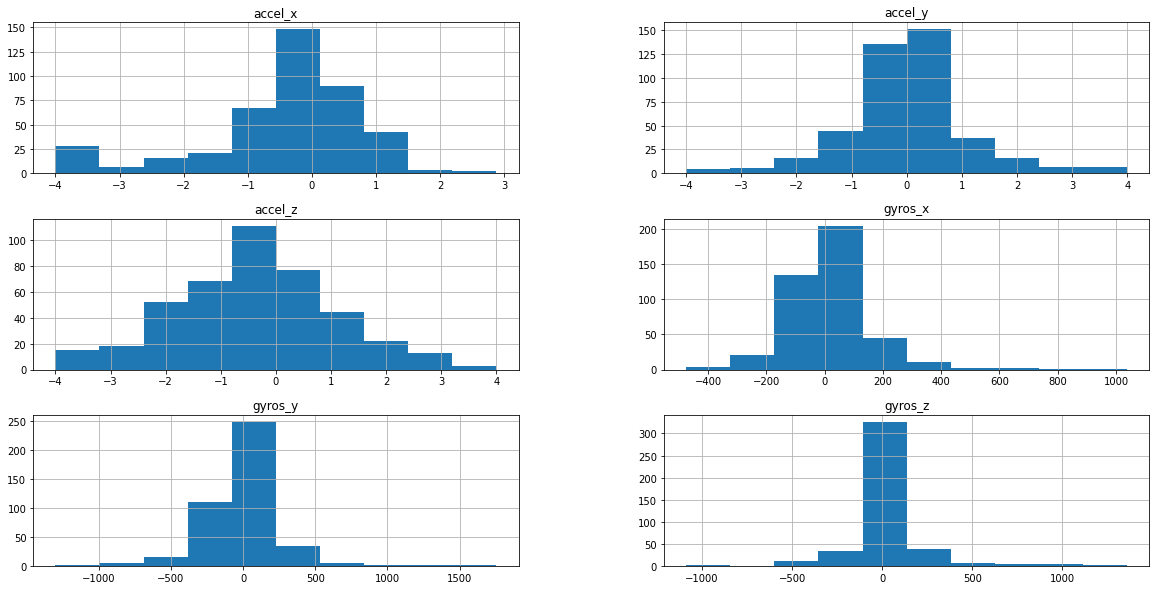

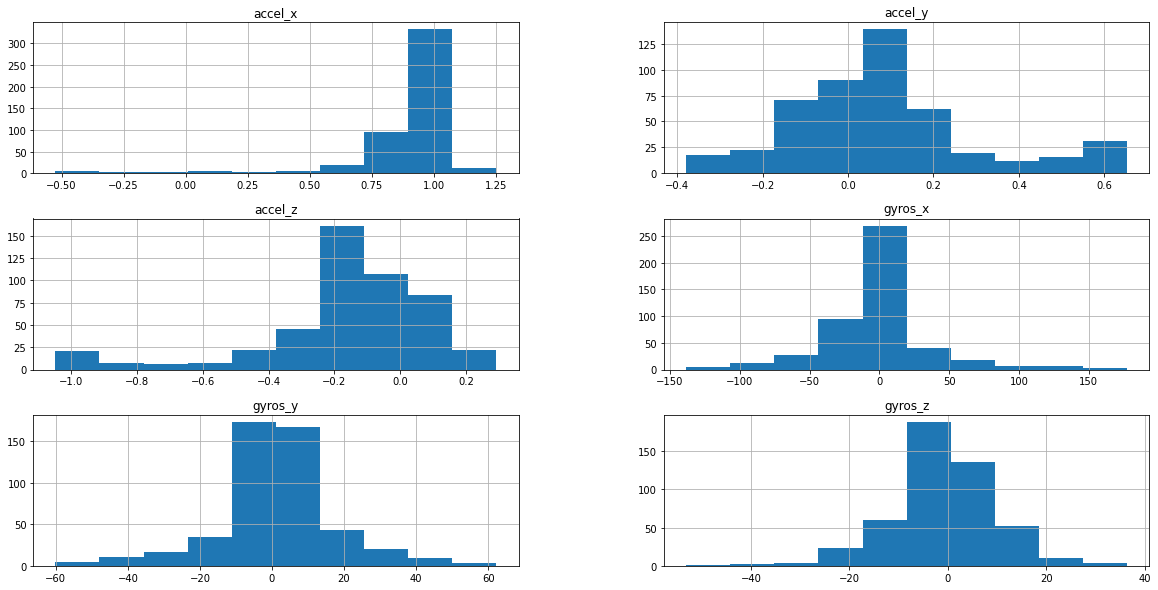

In [63]:
display(df_falldown[df_falldown.columns[:-1]].hist(figsize=(20,10)))
display(df_normal[df_normal.columns[:-1]].hist(figsize=(20,10)))

In [64]:
# Split dependent and independent variables
y = df.output
X = df[df.columns[:-1]]

# Split dataset in train and test
test_portion = 0.3
seed = random.randint(2,100)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_portion, random_state=seed)

## Normalize data

In [65]:
# Set a fixed random seed value, for reproducibility, this will allow us to get
# the same random numbers each time the notebook is run
SEED = 1000
np.random.seed(SEED)
tf.random.set_seed(SEED)

# the list of gestures that data is available for
STATES = [
    "normal",
    "falldown",
]
SAMPLES_PER_STATE = df.shape[0]

inputs = []
outputs = []
tensor = []

for index in range(SAMPLES_PER_STATE):
    # normalize the input data, between 0 to 1:
    # - acceleration is between: -4 to +4
    # - gyroscope is between: -2000 to +2000
    tensor = [
        (df['accel_x'][index] + 4) / 8,
        (df['accel_y'][index] + 4) / 8,
        (df['accel_z'][index] + 4) / 8,
        (df['gyros_x'][index] + 2000) / 4000,
        (df['gyros_y'][index] + 2000) / 4000,
        (df['gyros_z'][index] + 2000) / 4000
    ]
    output = df["output"][index]
    
    inputs.append(tensor)
    outputs.append(output)

# convert the list to numpy array
inputs = np.array(inputs)
outputs = np.array(outputs)

## Split train, validate and test dataset

Randomly split input and output pairs into sets of data: 60% for training, 20% for validation, and 20% for testing.

  - the training set is used to train the model
  - the validation set is used to measure how well the model is performing during training
  - the testing set is used to test the model after training

In [66]:
# Randomize the order of the inputs, so they can be evenly distributed for training, testing, and validation
num_inputs = len(inputs)
randomize = np.arange(num_inputs)
np.random.shuffle(randomize)

# Swap the consecutive indexes (0, 1, 2, etc) with the randomized indexes
inputs = inputs[randomize]
outputs = outputs[randomize]

# Split the recordings (group of samples) into three sets: training, testing and validation
TRAIN_SPLIT = int(0.6 * num_inputs)
TEST_SPLIT = int(0.2 * num_inputs + TRAIN_SPLIT)

inputs_train, inputs_test, inputs_validate = np.split(inputs, [TRAIN_SPLIT, TEST_SPLIT])
outputs_train, outputs_test, outputs_validate = np.split(outputs, [TRAIN_SPLIT, TEST_SPLIT])

print("Data set randomization and splitting complete.")

Data set randomization and splitting complete.


## Train model

In [67]:
EPOCHS = 300
BATCH_SIZE = 1

# build the model and train it
model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(16, activation='relu')) # relu is used for performance
model.add(tf.keras.layers.Dropout(0.3, seed=SEED)) # Evitamos conexiones de neuronas, así no entramos en overfitting

model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3, seed=SEED)) # Evitamos conexiones de neuronas, así no entramos en overfitting

model.add(tf.keras.layers.Dense(1, activation='sigmoid')) # Sigmoid, because we expect one state per input

# Compile model 
model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['acc'])

# Create a class to print every epoch_interval the log of the training model
class SelectiveProgbarLogger(tf.keras.callbacks.ProgbarLogger):
    def __init__(self, verbose, epoch_interval, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.default_verbose = verbose
        self.epoch_interval = epoch_interval
    
    def on_epoch_begin(self, epoch, *args, **kwargs):
        self.verbose = (
                        0 
                        if epoch % self.epoch_interval != 0 
                        else self.default_verbose
        )
        super().on_epoch_begin(epoch, *args, **kwargs)

history = model.fit(inputs_train, outputs_train, epochs=EPOCHS, batch_size=BATCH_SIZE, 
                    use_multiprocessing=True, callbacks=[SelectiveProgbarLogger(verbose=1, epoch_interval=EPOCHS/6)], verbose=0, 
                    validation_data=(inputs_validate, outputs_validate))

print(model.summary())

Epoch 1/300
542/542 [==============================] - 2s 3ms/sample - loss: 0.6709 - acc: 0.5572 - val_loss: 0.6489 - val_acc: 0.8187
Epoch 51/300
542/542 [==============================] - 1s 1ms/sample - loss: 0.3073 - acc: 0.8856 - val_loss: 0.2129 - val_acc: 0.9451
Epoch 101/300
542/542 [==============================] - 1s 1ms/sample - loss: 0.2979 - acc: 0.8875 - val_loss: 0.1905 - val_acc: 0.9560
Epoch 151/300
542/542 [==============================] - 1s 1ms/sample - loss: 0.2928 - acc: 0.8948 - val_loss: 0.2507 - val_acc: 0.9286
Epoch 201/300
542/542 [==============================] - 1s 1ms/sample - loss: 0.2884 - acc: 0.8875 - val_loss: 0.1814 - val_acc: 0.9560
Epoch 251/300
542/542 [==============================] - 1s 1ms/sample - loss: 0.2734 - acc: 0.8893 - val_loss: 0.1647 - val_acc: 0.9560
Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_75 (Dense)         

## Validate binary classification model

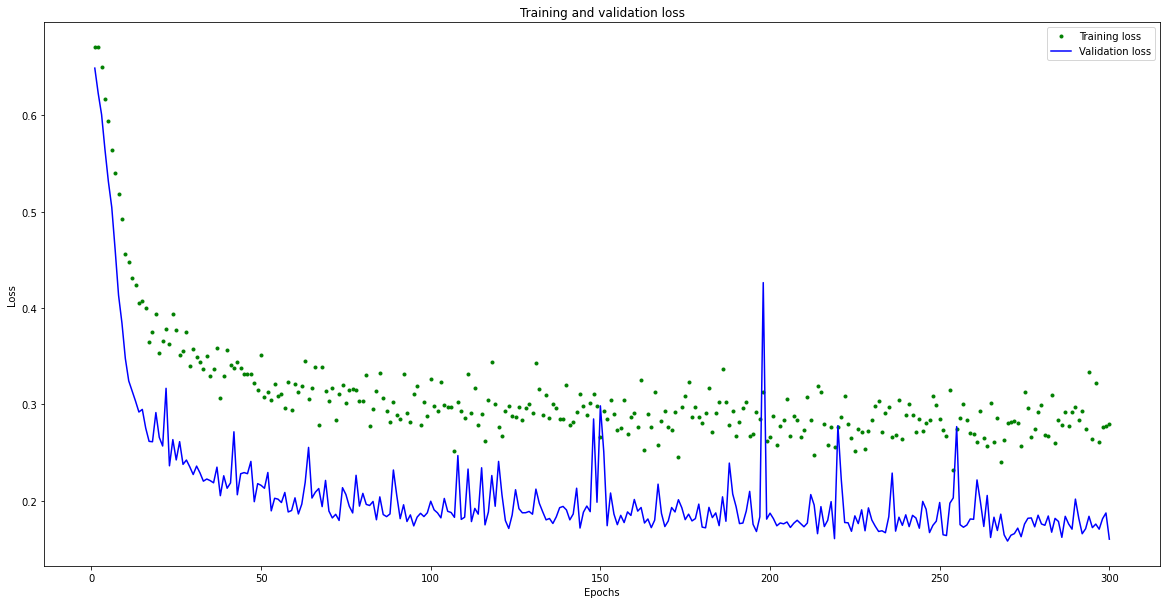

[20.0, 10.0]


In [68]:
# increase the size of the graphs. The default size is (6,4).
plt.rcParams["figure.figsize"] = (20,10)

# graph the loss, the model above is configure to use "accuracy" as the loss function
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

print(plt.rcParams["figure.figsize"])

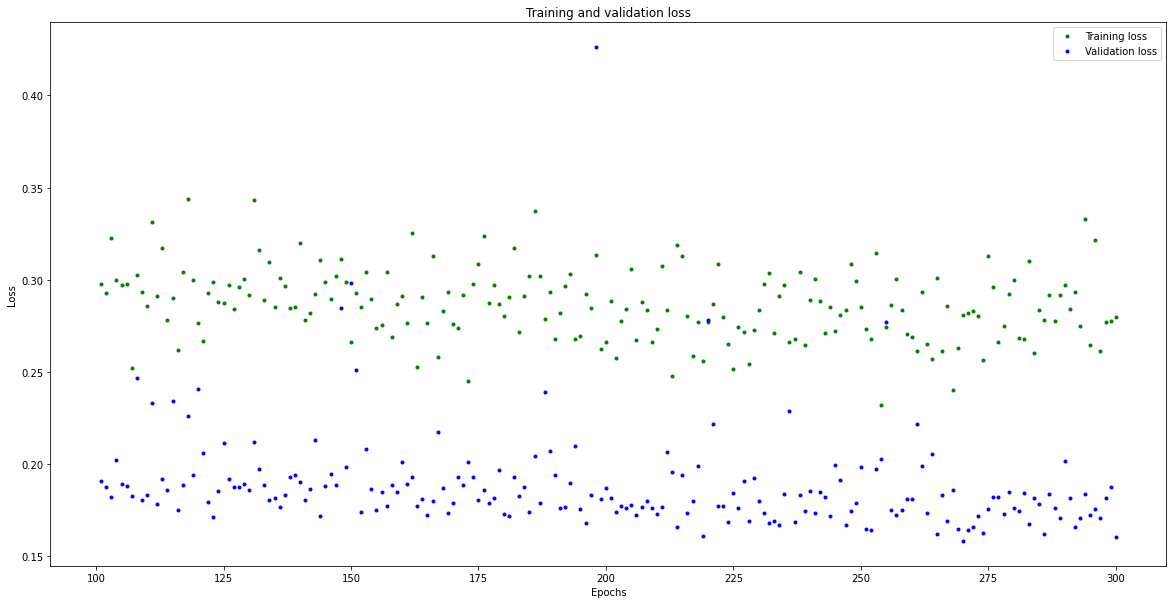

In [69]:
# graph the loss again skipping a bit of the start
SKIP = 100
plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

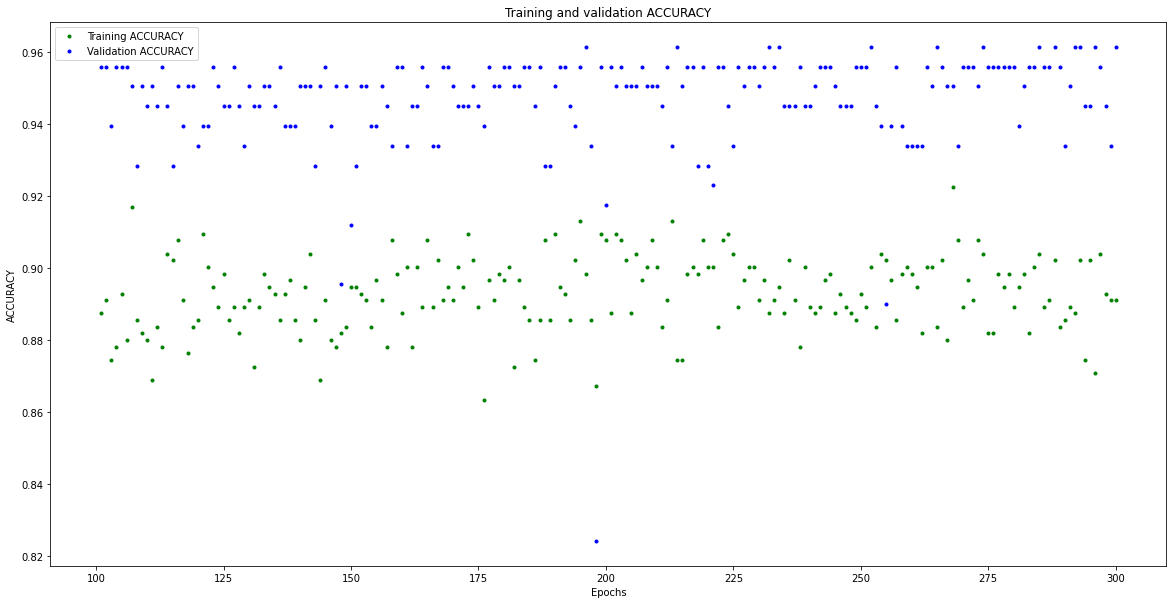

In [70]:
# graph of accuracy
mae = history.history['acc']
val_mae = history.history['val_acc']
plt.plot(epochs[SKIP:], mae[SKIP:], 'g.', label='Training ACCURACY')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation ACCURACY')
plt.title('Training and validation ACCURACY')
plt.xlabel('Epochs')
plt.ylabel('ACCURACY')
plt.legend()
plt.show()

6/6 [==============================] - 0s 2ms/step


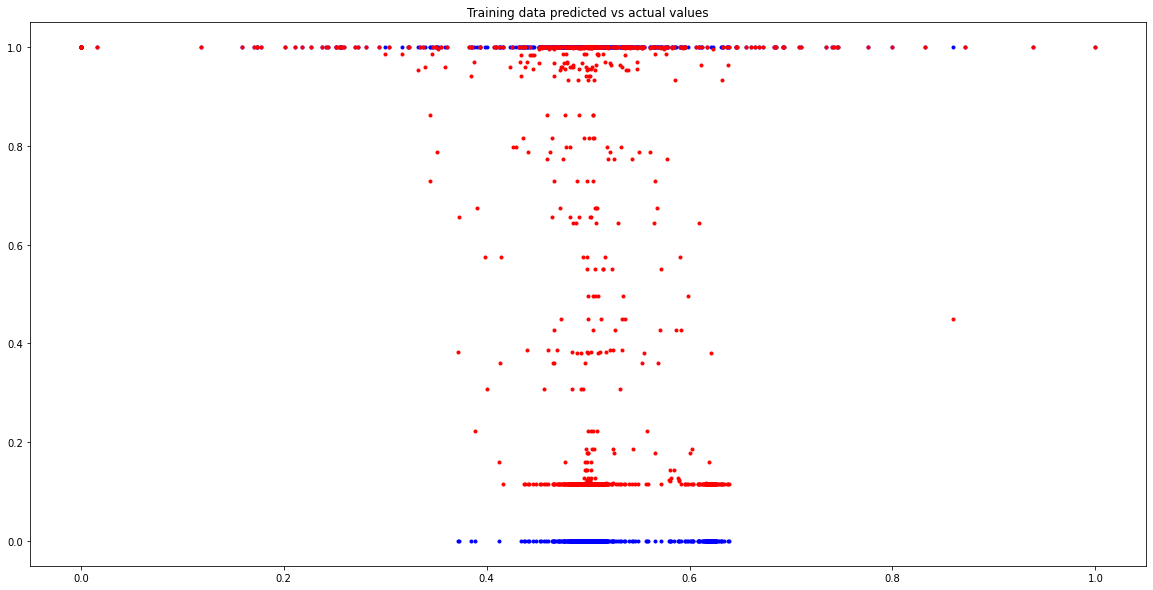

In [71]:
# use the model to predict the test inputs
predictions = model.predict(inputs_test)

# print the predictions and the expected ouputs
# print("predictions =\n", np.round(predictions, decimals=3))
# print("actual =\n", outputs_test)

# Plot the predictions along with to the test data
plt.clf()
plt.title('Training data predicted vs actual values')
plt.plot(inputs_test, outputs_test, 'b.', label='Actual')
plt.plot(inputs_test, predictions, 'r.', label='Predicted')
plt.show()

In [72]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

my_acc = accuracy_score(outputs_test, predictions.round())
print("Accuracy of the model {:.2f}%".format(my_acc*100))

my_prec = precision_score(outputs_test, predictions.round())
print("Precision of the model {:.2f}%".format(my_prec*100))

my_recall = recall_score(outputs_test, predictions.round())
print("Recall score of the model {:.2f}%".format(my_recall*100))

my_f1 = f1_score(outputs_test, predictions.round())
print("F1 score of the model {:.2f}%".format(my_f1*100))

Accuracy of the model 93.89%
Precision of the model 97.22%
Recall score of the model 88.61%
F1 score of the model 92.72%


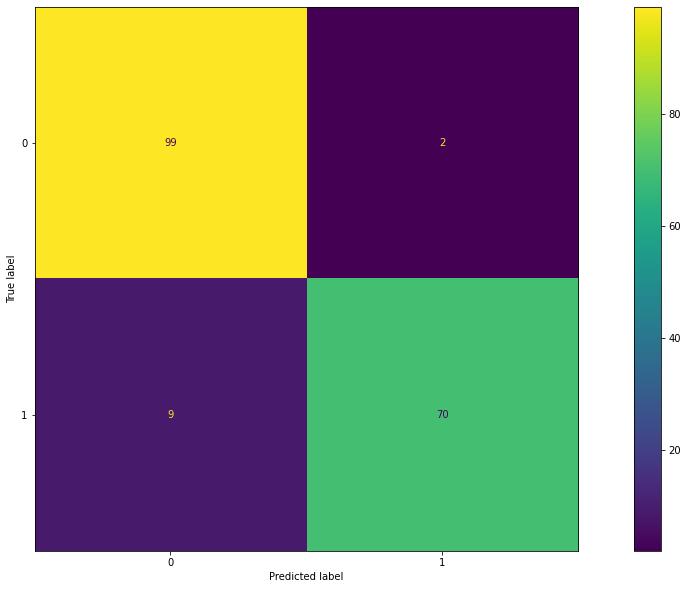

In [73]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

rounded_predictions = predictions.round()
cm = confusion_matrix(y_true=outputs_test, y_pred=rounded_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

## Convert the Trained Model to Tensor Flow Lite

In [74]:
# Convert the model to the TensorFlow Lite format without quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model to disk
open("state_model.tflite", "wb").write(tflite_model)
  
import os
basic_model_size = os.path.getsize("state_model.tflite")
print("Model is %d bytes" % basic_model_size)

INFO:tensorflow:Assets written to: C:\Users\Ruben\AppData\Local\Temp\tmpg358yzg_\assets


INFO:tensorflow:Assets written to: C:\Users\Ruben\AppData\Local\Temp\tmpg358yzg_\assets


Model is 3116 bytes


In [78]:
!echo "const unsigned char model[] = {" > /content/model.h
!cat gesture_model.tflite | xxd -i      >> /content/model.h
!echo "};"                              >> /content/model.h
import os
PATH = "./content/model.h"
model_h_size = os.path.getsize(PATH)
print(f"Header file, model.h, is {model_h_size:,} bytes.")
print("\nOpen the side panel (refresh if needed). Double click model.h to download the file.")

The system cannot find the path specified.
The system cannot find the path specified.


Header file, model.h, is 19,313 bytes.

Open the side panel (refresh if needed). Double click model.h to download the file.


The system cannot find the path specified.
